<a href="https://colab.research.google.com/github/shyamsundar-v/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

Connecting to Drive to Import Data

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import necessary Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [45]:
tel_df = pd.read_csv('/content/drive/MyDrive/EDA_Telecom_Churn/Data/Telecom Churn.csv')
print(tel_df.shape)
tel_df.head()

(3333, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [46]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [47]:
tel_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


From the above we can see that there are no features with the null values.

In [48]:
len(tel_df['State'].value_counts())

51

Basic Analysis of all the features

Text(0.5, 1.0, 'State Count Of Subscribers')

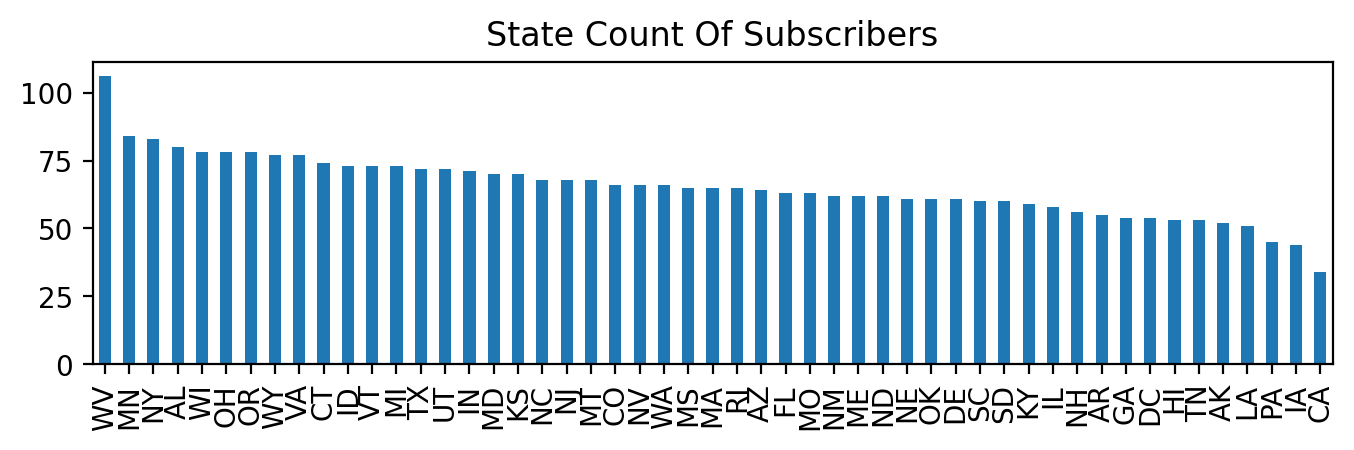

In [49]:
plt.figure(figsize=(8,2),dpi=200)
tel_df['State'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('State Count Of Subscribers')

In [50]:
tel_df['Churn']=tel_df['Churn'].apply(lambda x : 1 if x==True else 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


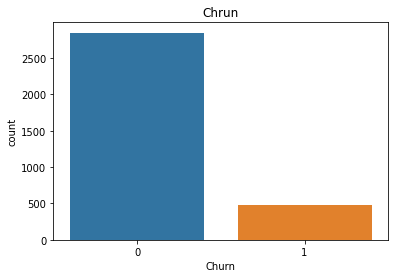

In [51]:
sns.countplot(tel_df['Churn'])
plt.title('Chrun')
plt.show()

From the above plot we can say thatwe have less number of subscribers have cancelled the subscription compared to the total count which is around 16%

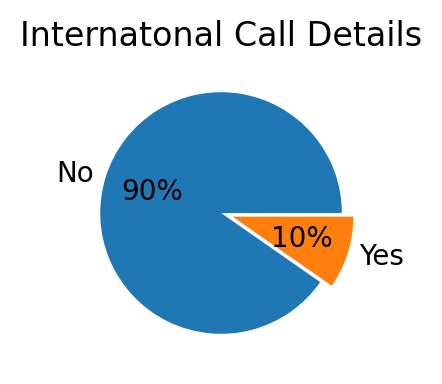

In [52]:
plt.figure(figsize=(5,2),dpi=200)
plt.pie(tel_df['International plan'].value_counts(),labels=['No','Yes'],autopct='%.0f%%',explode=[0,0.1])
plt.title('Internatonal Call Details')
plt.show()

From the above we can see that 90% of the states have No international plan facility and states with just 10% have International plan facility.

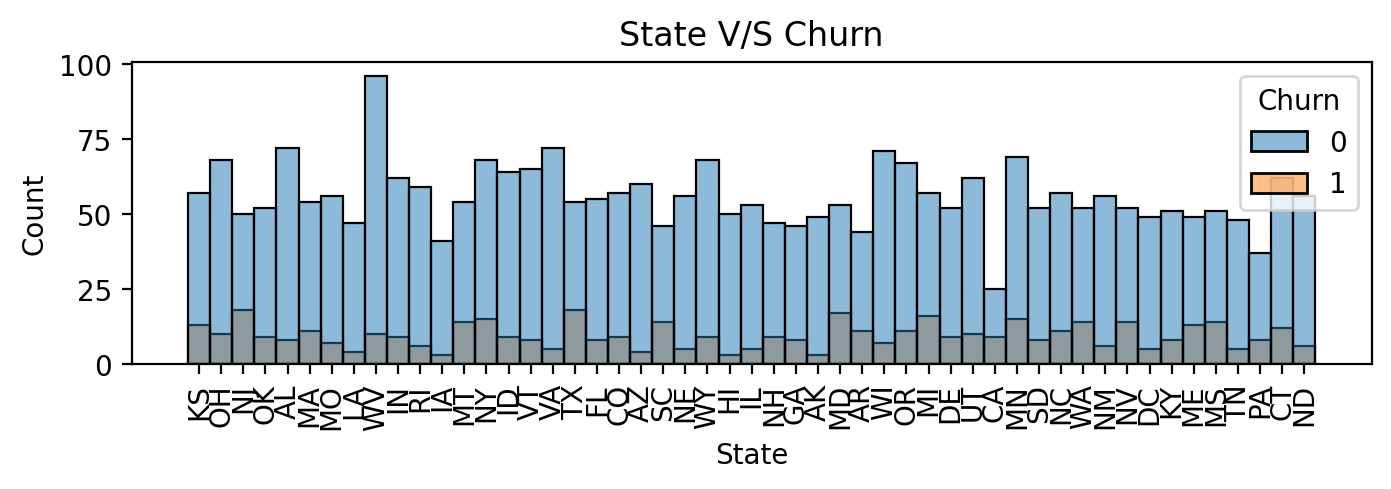

In [54]:
plt.figure(figsize=(8,2),dpi=200)
sns.histplot(x='State',hue='Churn',data=tel_df)
plt.title('State V/S Churn')
plt.xticks(Rotation=90)
plt.show()

We can conclude from the above plot that NJ and TX states have the subscribers with highest cancellation of subscription and IA with the lowest.

Also the state WV has the highest number of subscribers who have withhold the subscription and CA is the state with the lowest withhold of subscription.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


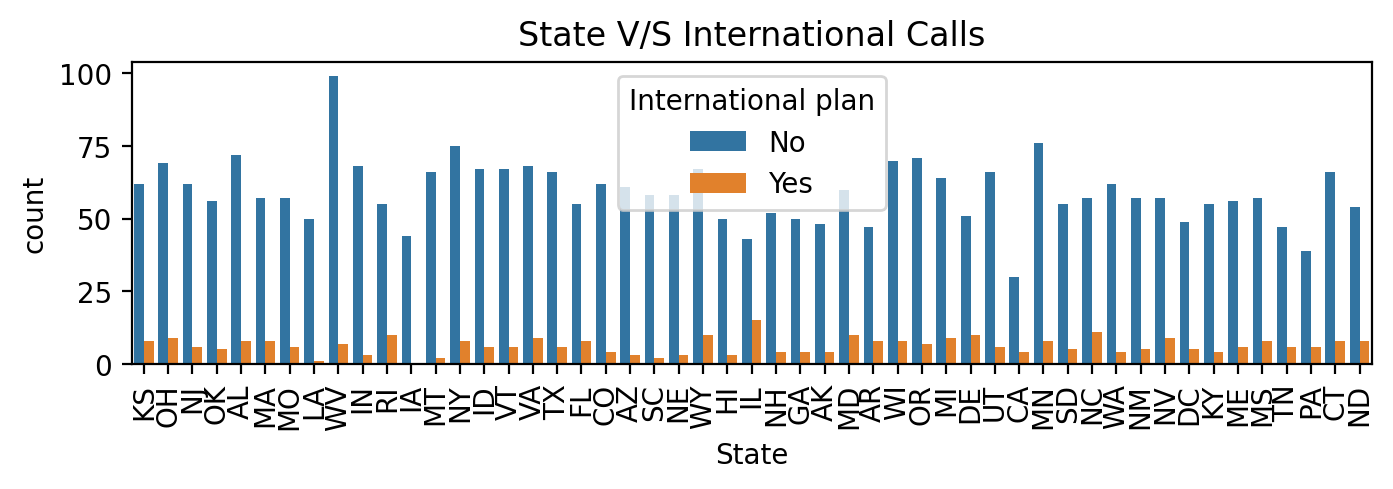

In [55]:

plt.figure(figsize=(8,2),dpi=200)
sns.countplot(tel_df['State'],hue=tel_df['International plan'])
plt.title('State V/S International Calls')
plt.xticks(Rotation=90)
plt.show()

Analysis of International calls wrt State:-


1.   Highest Iternational Calls -IL( Even though not a hight subscribed state)
2.   Lowest/No Iternational Calls -IA followed by LA
3.   WV the state with highest subscribers also have a record of very less international calls facility.
4.   Similarly the lowest subscribers state CA also has the subscribers with lowest international calls facility.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


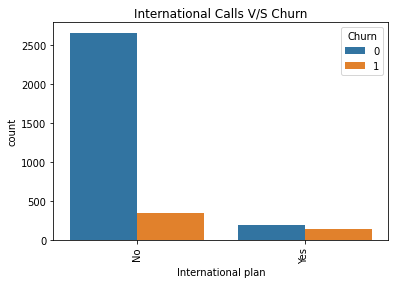

In [56]:
sns.countplot(tel_df['International plan'],hue=tel_df['Churn'])
plt.title('International Calls V/S Churn')
plt.xticks(Rotation=90)
plt.show() 

For the state which has International plan Chrun rate is almost similar and for the states with no internation plan subscription withdrawl from the customer is low as 16% which is same as total churan rate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


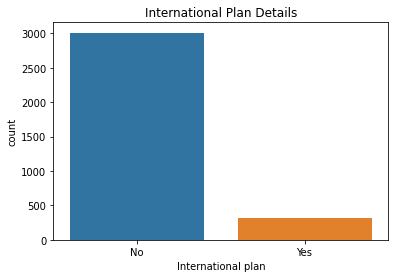

In [57]:

sns.countplot(tel_df['International plan'])
plt.title('International Plan Details')
plt.show();



In [58]:
print(f"Percentage of International plans {tel_df['International plan'].value_counts()['Yes']/tel_df.shape[0]*100}")
print(f"Percentage of Non International plans {tel_df['International plan'].value_counts()['No']/tel_df.shape[0]*100}")


Percentage of International plans 9.69096909690969
Percentage of Non International plans 90.3090309030903


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Percentage of Voice mail plans 27.662766276627664
Percentage of Non Voice mail plans 72.33723372337234




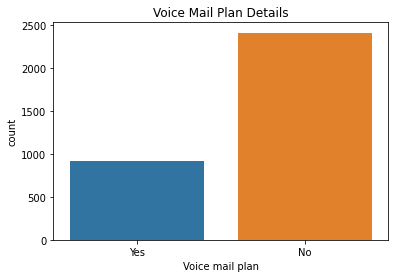

In [59]:
print(f"Percentage of Voice mail plans {tel_df['Voice mail plan'].value_counts()['Yes']/tel_df.shape[0]*100}")
print(f"Percentage of Non Voice mail plans {tel_df['Voice mail plan'].value_counts()['No']/tel_df.shape[0]*100}")
print()
print()
sns.countplot(tel_df['Voice mail plan'])
plt.title('Voice Mail Plan Details')
plt.show();

From the above plot we can say that there are around 28% of the subscribers who has Voice mails plan and the rest 72% dont have Voice mail plans

In [60]:
tel_df['International plan']=tel_df['International plan'].apply(lambda x : 1 if x=='Yes' else 0)
tel_df['Voice mail plan']=tel_df['Voice mail plan'].apply(lambda x : 1 if x=='Yes' else 0)

In [61]:
tel_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


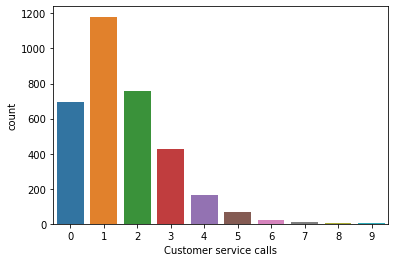

In [62]:
sns.countplot(tel_df['Customer service calls'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


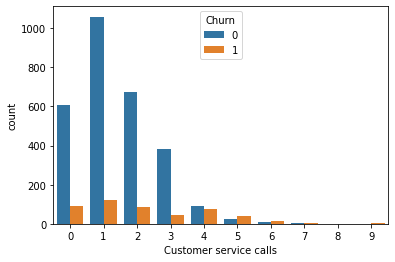

In [63]:
sns.countplot(tel_df['Customer service calls'],hue=tel_df['Churn'])

In [64]:
cus_df = pd.crosstab(tel_df['Customer service calls'],tel_df['Churn'],normalize='index')
cus_df['Percent of churn']= cus_df.apply(lambda x : (x[1]*100)/(x[0]+x[1]),axis=1)
cus_df=cus_df.sort_values('Percent of churn',ascending=False)
cus_df.reset_index()
cus_df

Churn,0,1,Percent of churn
Customer service calls,,,
9,0.000000,1.000000,100.000000
6,0.363636,0.636364,63.636364
5,0.393939,0.606061,60.606061
7,0.444444,0.555556,55.555556
8,0.500000,0.500000,50.000000
4,0.542169,0.457831,45.783133
0,0.868006,0.131994,13.199426
2,0.885375,0.114625,11.462451
1,0.896698,0.103302,10.330229


Text(0.5, 1.0, 'Customer servivce call v/s churn')

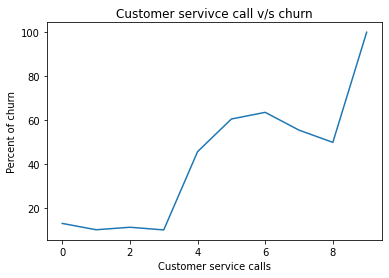

In [65]:
sns.lineplot(x='Customer service calls',y='Percent of churn',data=cus_df)
plt.title('Customer servivce call v/s churn')

From the above 2 plots:-


1.   Most of the customers perferred calling just once or 2 times to the customer servive and majority of the people have not used this service
2.   The customer availing the customer call service between 0-3 has a pobability of getting churnes around 12 and more the number of times customer using this service higher the chances of getting churned.





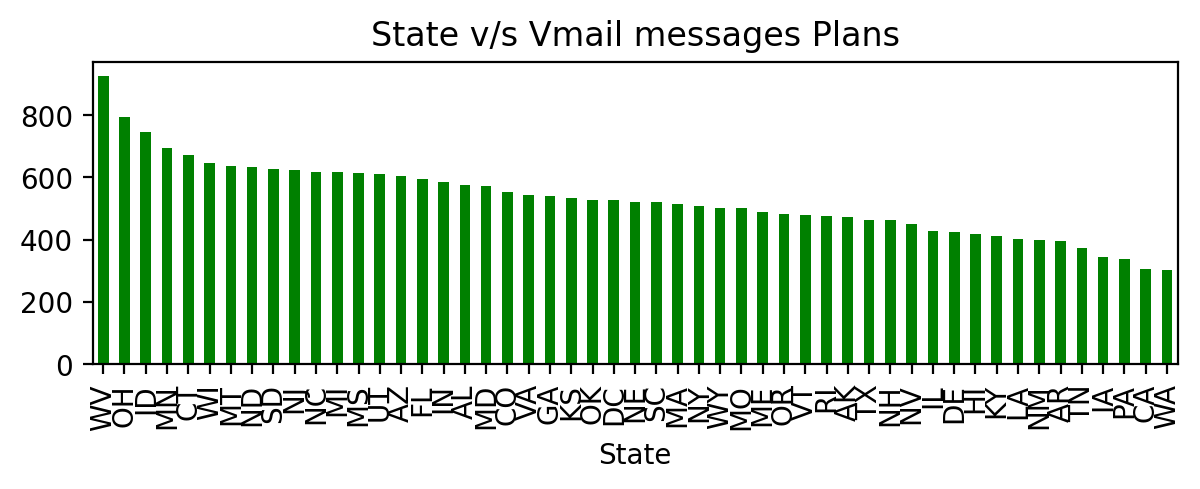

In [66]:
plt.figure(figsize=(7,2),dpi=200)
tel_df.groupby(['State'])['Number vmail messages'].sum().sort_values(ascending=False).plot(kind='bar',color = ['green'])
plt.title('State v/s Vmail messages Plans')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


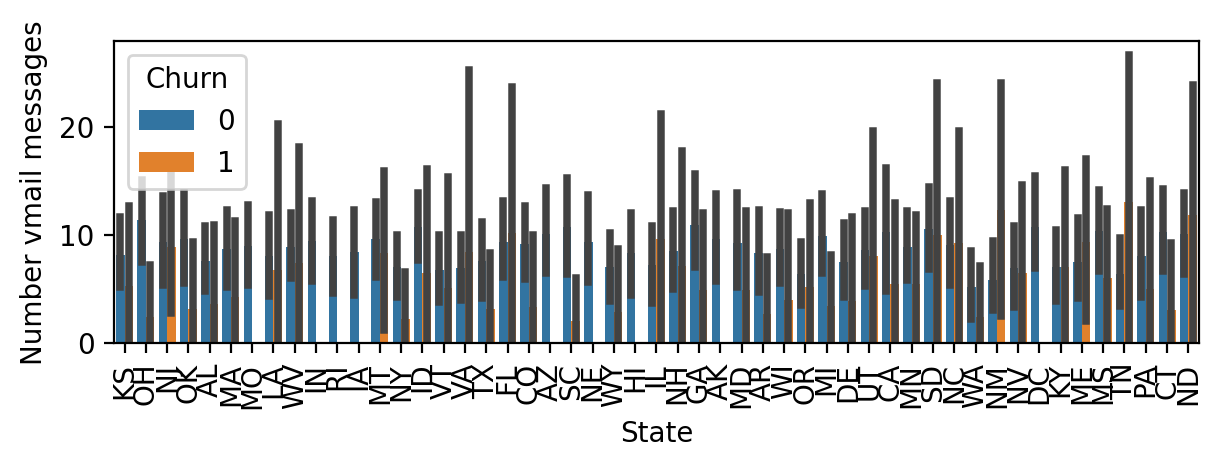

In [67]:
plt.figure(figsize=(7,2),dpi=200)
sns.barplot(tel_df['State'],tel_df['Number vmail messages'],hue=tel_df['Churn'])
plt.xticks(rotation=90)
plt.show();

From the above plot we can say that the state with the highest number of subscribers WV has high number of vmail plans and the state with lowest of vmail plans is with WA followed precceded by the state CA with the lowest number of subscribers.

From the 2nd plot we can say thatthere are very few states in terms of Vmail messages got churned of count 16 out of 51 states. So need some modification in the Vmail messages plan in those 16 states. 

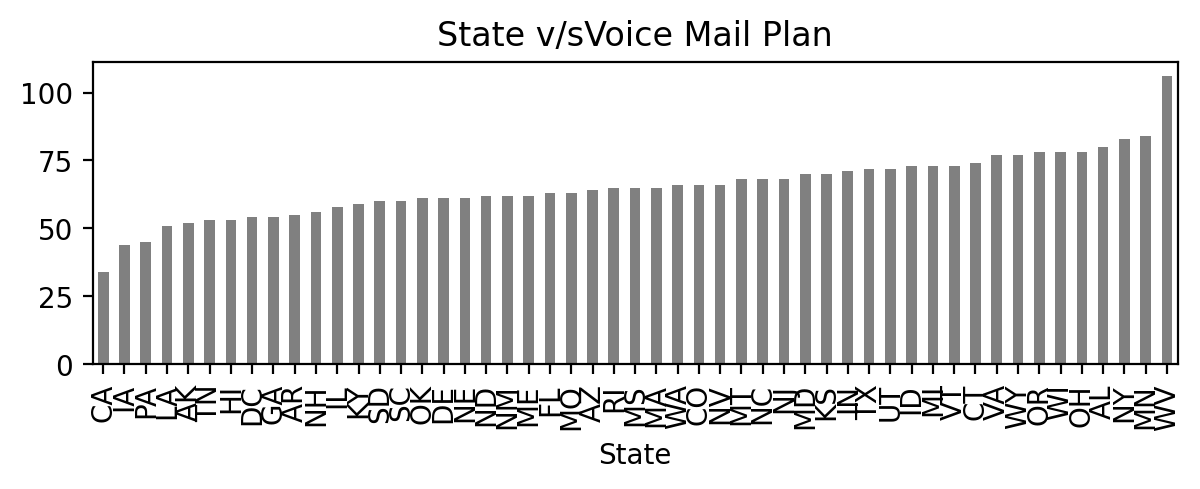

In [68]:
plt.figure(figsize=(7,2),dpi=200)
tel_df.groupby(['State'])['Voice mail plan'].count().sort_values(ascending=True).plot(kind='bar',color = ['grey'])
plt.title('State v/sVoice Mail Plan')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


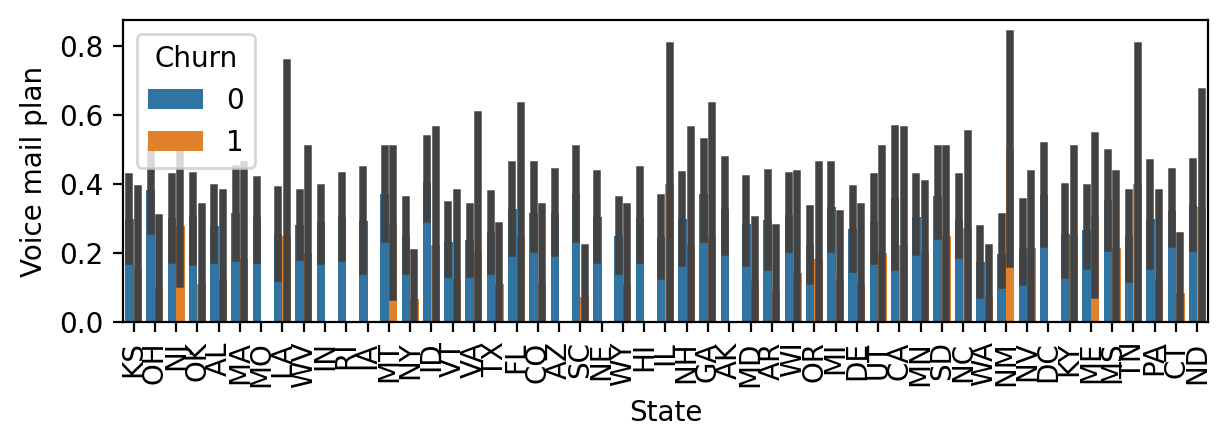

In [69]:
plt.figure(figsize=(7,2),dpi=200)
sns.barplot(tel_df['State'],tel_df['Voice mail plan'],hue=tel_df['Churn'])
plt.xticks(rotation=90)
plt.show();

From the above plot we can say that the state with the highest number of subscribers WV has high number of vmail plans and the state with lowest of vmail plans is with CA is also the state  with the lowest number of subscribers.

From the 2nd plot we can say that there are very few states in terms of voice maik plan got churned of count 16 out of 51 states. So need some modification in the Vmail messages plan in those 16 states.

The state which got churned in terms of Vmessages plan has a major possibility of getting churned in case of voice mail plan as well.

So needed a major change in these 2 plans to save hold the customer subscription

Analysis of State and Customer Service call wrt Churn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


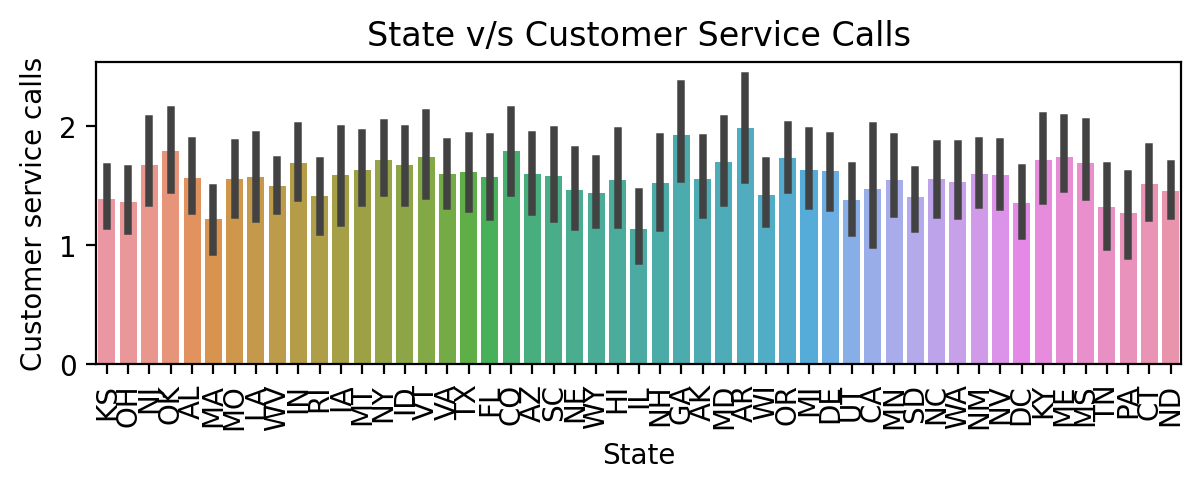

In [70]:
plt.figure(figsize=(7,2),dpi=200)
sns.barplot(tel_df['State'],tel_df['Customer service calls'])
plt.title('State v/s Customer Service Calls')
plt.xticks(rotation=90)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


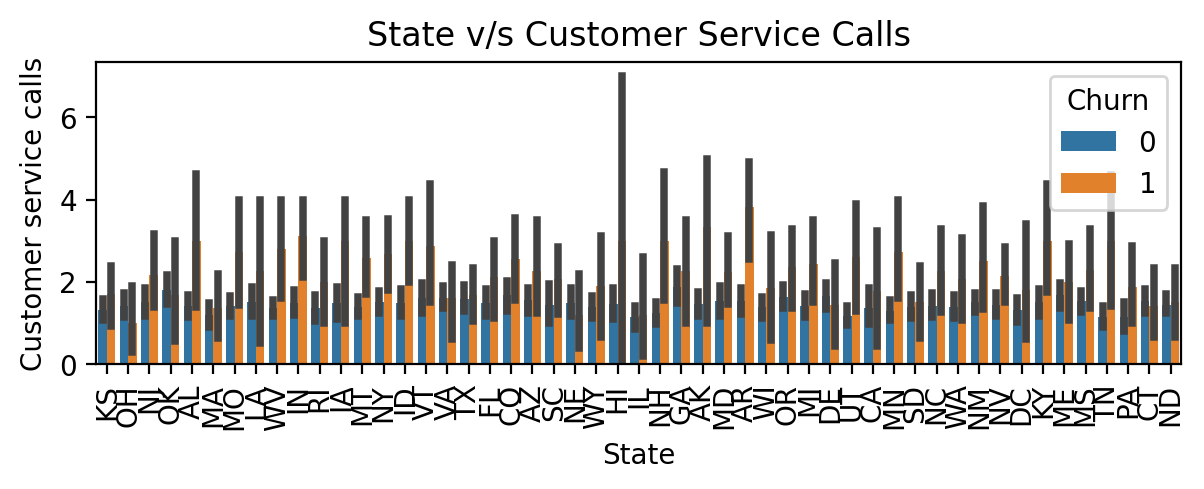

In [71]:
plt.figure(figsize=(7,2),dpi=200)
sns.barplot(tel_df['State'],tel_df['Customer service calls'],hue=tel_df['Churn'])
plt.title('State v/s Customer Service Calls')
plt.xticks(rotation=90)
plt.show();

From the 1st plot we can say that the state AR has the highest customer service calls and the state IL has the lowest customer service calls

But from the 2nd plot, we can say that higher the state with customer service calls higher the churn rate and vice versa 

Also irrespective of the count of no of customer service calls for any state, the number of subscribers being held without dropping off is almost same in every state.

Now Lets change the days, evneing and night, callsminutes and charges to the summation of respective field

In [72]:
modified_tel_df = tel_df.copy()

Minutes Analyis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

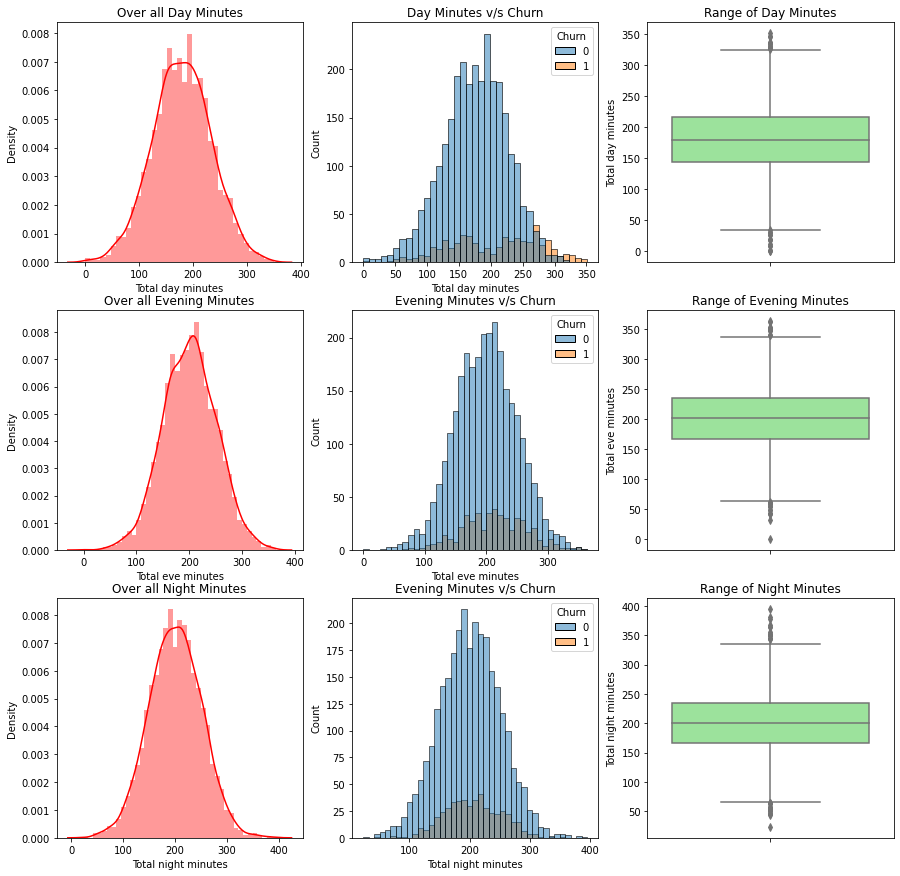

In [73]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
sns.distplot(tel_df['Total day minutes'],color='red')
plt.title('Over all Day Minutes')
plt.subplot(3,3,2)
sns.histplot(x='Total day minutes',hue='Churn',data=tel_df)
plt.title('Day Minutes v/s Churn')
plt.subplot(3,3,3)
sns.boxplot(y='Total day minutes',data=tel_df,color='lightgreen')
plt.title('Range of Day Minutes')

plt.subplot(3,3,4)
sns.distplot(modified_tel_df['Total eve minutes'],color='red')
plt.title('Over all Evening Minutes')
plt.subplot(3,3,5)
sns.histplot(x='Total eve minutes',hue='Churn',data=tel_df)
plt.title('Evening Minutes v/s Churn')
plt.subplot(3,3,6)
sns.boxplot(y='Total eve minutes',data=tel_df,color='lightgreen')
plt.title('Range of Evening Minutes')

plt.subplot(3,3,7)
sns.distplot(modified_tel_df['Total night minutes'],color='red')
plt.title('Over all Night Minutes')
plt.subplot(3,3,8)
sns.histplot(x='Total night minutes',hue='Churn',data=tel_df)
plt.title('Evening Minutes v/s Churn')
plt.subplot(3,3,9)
sns.boxplot(y='Total night minutes',data=tel_df,color='lightgreen')
plt.title('Range of Night Minutes')

plt.show();

From all the above plots we can conclude that:-


1.   The overall distribution of calling Minutes of Day, evening and night are almost similar wich are between 0-450 minutes a day.
2.   But most of the calls were happened between nights,followed by evening and morning and that too with very thin variation between them
3.   Coming to the churn with respective to minutes in a whole day, the customers who were having calls in the evening and nights haven't churned but the person having calls in day time got churned  that too when the count of minutes have exceeded 250.


Calls Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

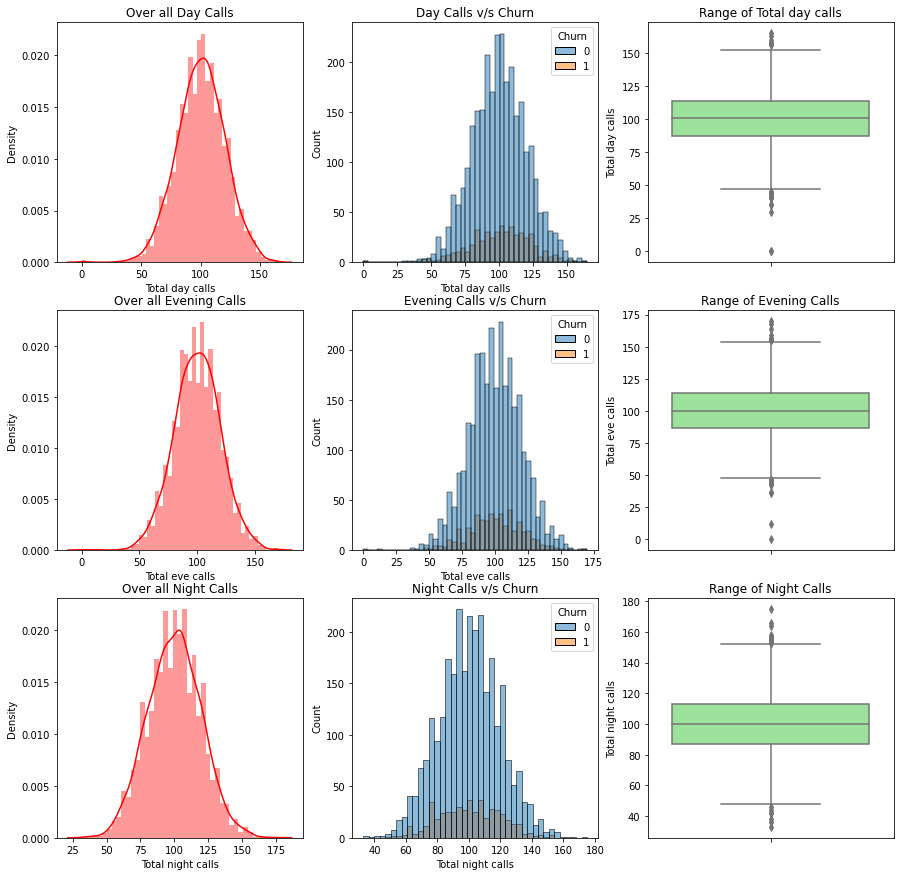

In [74]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
sns.distplot(tel_df['Total day calls'],color='red')
plt.title('Over all Day Calls')
plt.subplot(3,3,2)
sns.histplot(x='Total day calls',hue='Churn',data=tel_df)
plt.title('Day Calls v/s Churn')
plt.subplot(3,3,3)
sns.boxplot(y='Total day calls',data=tel_df,color='lightgreen')
plt.title('Range of Total day calls')

plt.subplot(3,3,4)
sns.distplot(modified_tel_df['Total eve calls'],color='red')
plt.title('Over all Evening Calls')
plt.subplot(3,3,5)
sns.histplot(x='Total eve calls',hue='Churn',data=tel_df)
plt.title('Evening Calls v/s Churn')
plt.subplot(3,3,6)
sns.boxplot(y='Total eve calls',data=tel_df,color='lightgreen')
plt.title('Range of Evening Calls')

plt.subplot(3,3,7)
sns.distplot(modified_tel_df['Total night calls'],color='red')
plt.title('Over all Night Calls')
plt.subplot(3,3,8)
sns.histplot(x='Total night calls',hue='Churn',data=tel_df)
plt.title('Night Calls v/s Churn')
plt.subplot(3,3,9)
sns.boxplot(y='Total night calls',data=tel_df,color='lightgreen')
plt.title('Range of Night Calls')

plt.show();

Analysis from the above plots:-


1.   The distribution of the calls ranges from a minutes of 1  to max of 160  calls  in case of day and evening but coming to the nights the minimum count of calls rages from 25 min to a max of 180 min.
2.   We cannot identify possible churn detelction with this feature calls.
3.   As the no of minutes is more in nights so obiveoulsy calls asre also more in the nights followed by evening and day.



Charge Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

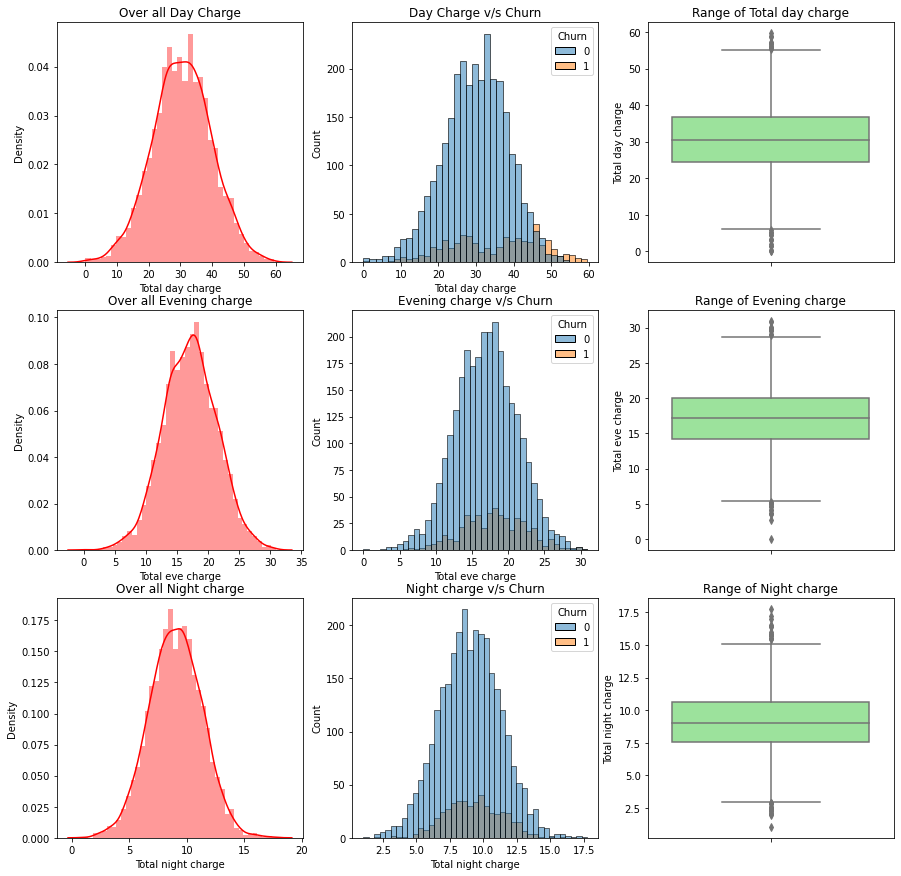

In [75]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
sns.distplot(tel_df['Total day charge'],color='red')
plt.title('Over all Day Charge')
plt.subplot(3,3,2)
sns.histplot(x='Total day charge',hue='Churn',data=tel_df)
plt.title('Day Charge v/s Churn')
plt.subplot(3,3,3)
sns.boxplot(y='Total day charge',data=tel_df,color='lightgreen')
plt.title('Range of Total day charge')

plt.subplot(3,3,4)
sns.distplot(modified_tel_df['Total eve charge'],color='red')
plt.title('Over all Evening charge')
plt.subplot(3,3,5)
sns.histplot(x='Total eve charge',hue='Churn',data=tel_df)
plt.title('Evening charge v/s Churn')
plt.subplot(3,3,6)
sns.boxplot(y='Total eve charge',data=tel_df,color='lightgreen')
plt.title('Range of Evening charge')

plt.subplot(3,3,7)
sns.distplot(modified_tel_df['Total night charge'],color='red')
plt.title('Over all Night charge')
plt.subplot(3,3,8)
sns.histplot(x='Total night charge',hue='Churn',data=tel_df)
plt.title('Night charge v/s Churn')
plt.subplot(3,3,9)
sns.boxplot(y='Total night charge',data=tel_df,color='lightgreen')
plt.title('Range of Night charge')

plt.show();

Analysis from the above plots:-


1.   Charge of calls in the night time is very less which is between 1-20, as a results the call minutes and count of the calls in high.
2.   But coming to the charge of the calls in the day and evening is very with an range of 0-60.
3. From the minutes analysis we can see that customers getting churn in the day time when minutes count exceeded 200+ that is beacuse the charge of the calls is very high in the day time, that we can clearly observe from the charge plot.
4. As the charges are less in the night time the customers having more calls and high number of call minutes in the nights.
5. So, there need to be modificatio  of plans required in the day and also in the evening time to withhold the subscriptio of the customers.



Analysis between Minutes and Charge

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


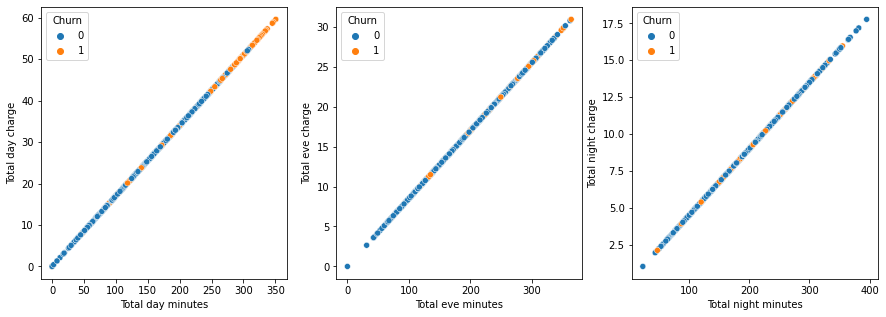

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(tel_df['Total day minutes'],tel_df['Total day charge'],hue=tel_df['Churn'])
plt.subplot(1,3,2)
sns.scatterplot(tel_df['Total eve minutes'],tel_df['Total eve charge'],hue=tel_df['Churn'])
plt.subplot(1,3,3)
sns.scatterplot(tel_df['Total night minutes'],tel_df['Total night charge'],hue=tel_df['Churn'])
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


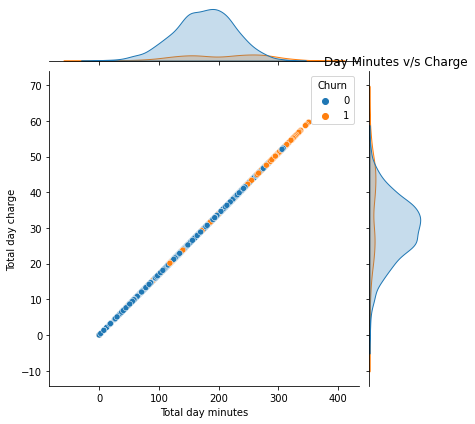

In [77]:

sns.jointplot(tel_df['Total day minutes'],tel_df['Total day charge'],hue=tel_df['Churn'])
plt.title('Day Minutes v/s Charge')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


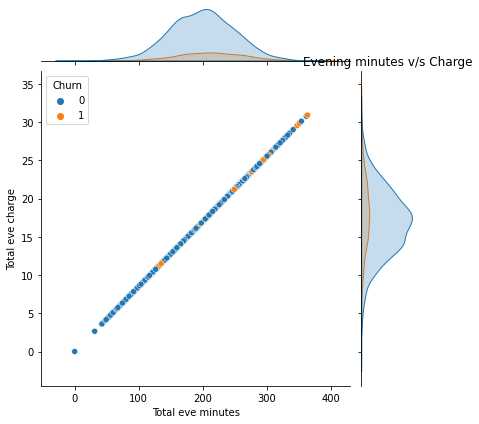

In [78]:

sns.jointplot(tel_df['Total eve minutes'],tel_df['Total eve charge'],hue=tel_df['Churn'])
plt.title('Evening minutes v/s Charge')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


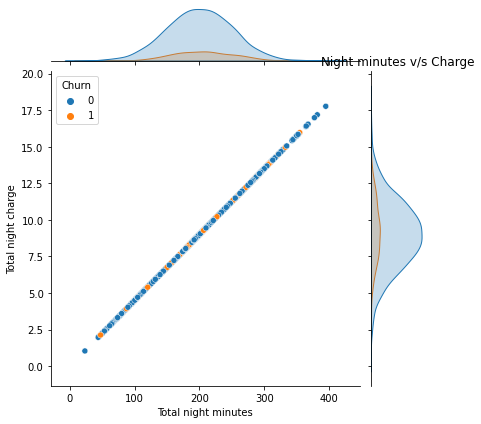

In [79]:

sns.jointplot(tel_df['Total night minutes'],tel_df['Total night charge'],hue=tel_df['Churn'])
plt.title('Night minutes v/s Charge')
plt.show();

From the Joint and Scatterplot we can see that there is somewhat churn taking place evening and also in night calls wrt charges but we cant fing it properly in the hist plot, it may be beacuse it's low.

But coming to the day minutes and charges we can see the churn rate clearly in all the displyed plots. This is beacuse the churn rate is high in the cutomers who were having more call minutes in the day. One of the reason may be because of high charges in the day.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


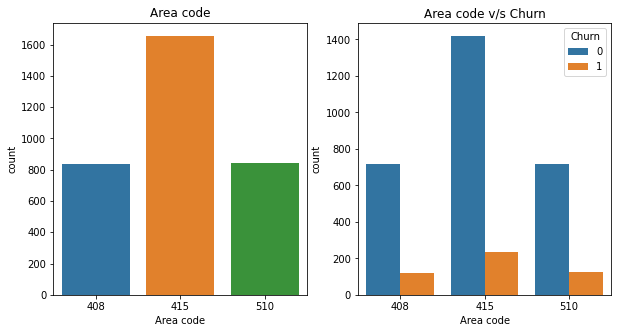

In [81]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(tel_df['Area code'])
plt.title('Area code')
plt.subplot(1,2,2)
sns.countplot(tel_df['Area code'],hue=tel_df['Churn'])
plt.title('Area code v/s Churn')

plt.show();

As we can see from the above that Are code 415 has the highest churn rate compared to the other 2 area codes. So let's analyse further on this area code feature.